# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


<AxesSubplot:>

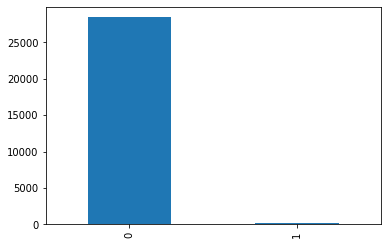

In [10]:
data.iloc[:,-1].value_counts().plot(kind='bar')

지금 데이터는 심각한 불균형 데이터인 것을 볼 수 있습니다.

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [23]:
print(y_train.value_counts()/y_train.count() * 100)
print(y_test.value_counts()/y_test.count() * 100)

0    99.144504
1     0.855496
Name: Class, dtype: float64
0    99.135286
1     0.864714
Name: Class, dtype: float64


사기 거래의 비율은 고작 0.86%밖에 되지 않습니다.

## 로지스틱 회귀 분석 및 성능 지표 설명

In [20]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))

In [21]:
def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    metrics(y_test, pred)

In [22]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 0.89, 재현율 : 0.87
f1-score : 0.88, auc : 0.93


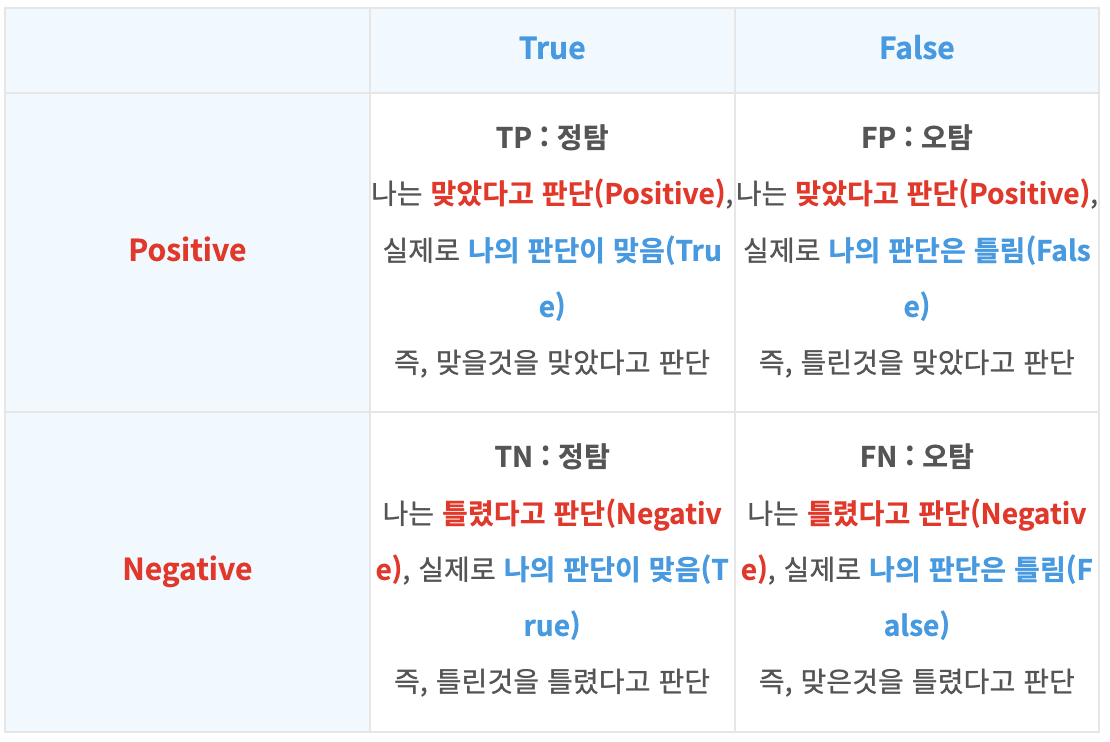

#### Acc(정확도) = TP + TN/TP + TN + FP + FN (전체 중에서 얼마나 맞추었는지)
#### Precision(정밀도) = TP/ TP + FP(모델이 맞았다고 한 애들 중 실제 맞은 애들의 비율)
#### Recall(재현율) = TP/TP + FN(정탐 중 실제로 맞은 애들)
#### f1_score : Recall과 Precision의 조화평균
#### ROC 커브: 모델의 임계값을 조정

## 성능 개선

<AxesSubplot:>

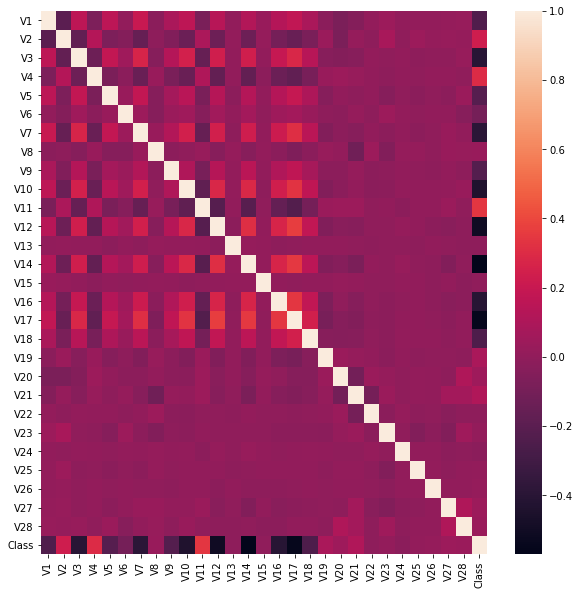

In [26]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), ax=ax)

Class와 음의 상관관계인 V3, V10, V14, V17에 대해서 이상치 제거를 해주겠습니다. 

<AxesSubplot:xlabel='Class', ylabel='V17'>

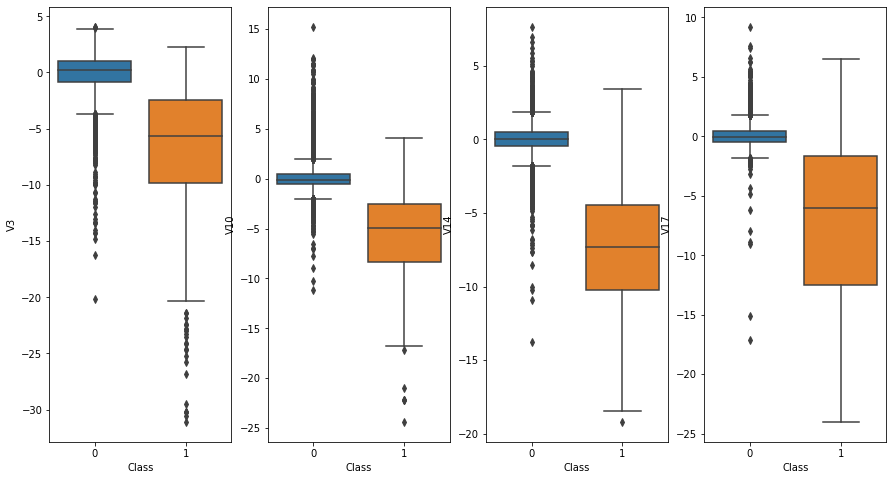

In [30]:
f ,axes = plt.subplots(ncols=4, figsize=(15,8))

sns.boxplot(x='Class', y='V3', data=data, ax=axes[0])
sns.boxplot(x='Class', y='V10', data=data, ax=axes[1])
sns.boxplot(x='Class', y='V14', data=data, ax=axes[2])
sns.boxplot(x='Class', y='V17', data=data, ax=axes[3])

In [31]:
def remove_outlier(d_cp, column):
    fraud_column_data = d_cp[d_cp['Class']==0][column]
    quan_25 = np.percentile(fraud_column_data, 25)
    quan_75 = np.percentile(fraud_column_data, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr*1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

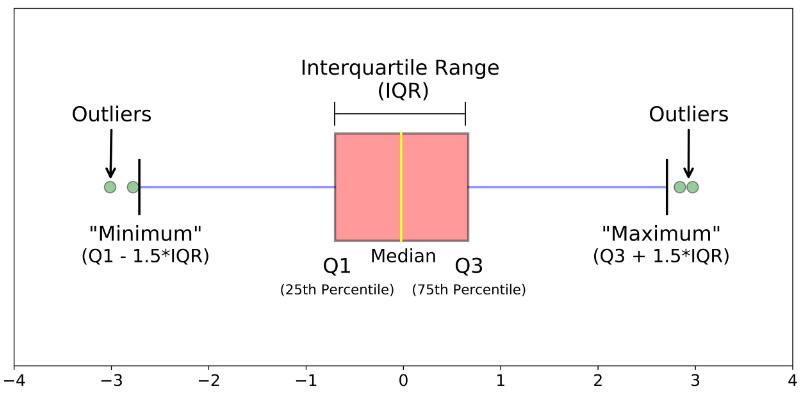이상치 제거는 IQR방식으로 처리해줍니다.
IQR는 데이터의 값을 기준으로 50% 구간에서 값이 '퍼져나간 정도'를 말해줍니다. 


In [32]:
data = remove_outlier(data, 'V3')
data = remove_outlier(data, 'V10')
data = remove_outlier(data, 'V14')
data = remove_outlier(data, 'V17')

318
(28360, 29)
793
(27567, 29)
1131
(26436, 29)
297
(26139, 29)


(318 + 793 + 1131 + 297)개의 이상치가 삭제된 것을 볼 수 있습니다.

In [34]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [36]:
lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 1.00, 재현율 : 0.92
f1-score : 0.96, auc : 0.96


##### 정밀도: 0.89 -> 1.00
##### 재현율: 0.87 -> 0.92
##### f1-score: 0.88 -> 0.93
##### auc: 0.93 -> 0.96
모든 성능지표에서 정확도를 향샹시킨 것을 볼 수 있습니다.